In [21]:
# Setup Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress

In [2]:
# Print current working directory address
os.getcwd()

'c:\\Users\\ramma\\Documents\\Ram\\Preparation\\Data Science\\Kaggle\\HousePricePrediction'

In [3]:
# Read the train and test csv files.
train_df = pd.read_csv('c:\\Users\\ramma\\Documents\\Ram\\Preparation\\Data Science\\Kaggle\\HousePricePrediction\\train.csv')
test_df = pd.read_csv('c:\\Users\\ramma\\Documents\\Ram\\Preparation\\Data Science\\Kaggle\\HousePricePrediction\\test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
#train_df.describe()
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
#train_df.describe(include = 'object')
test_df.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


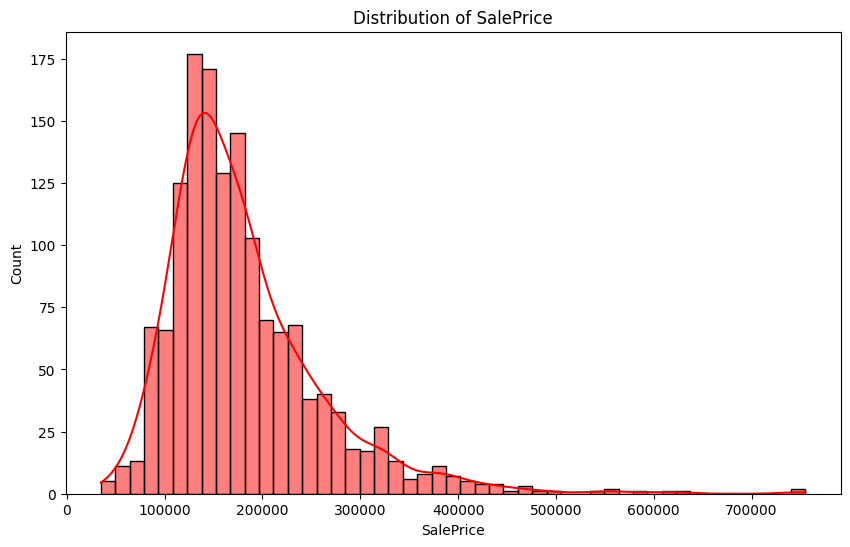

In [8]:
# Distribution of the target variable (SalePrice) - Bar Plot
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, color='r')
plt.title('Distribution of SalePrice')
plt.show()

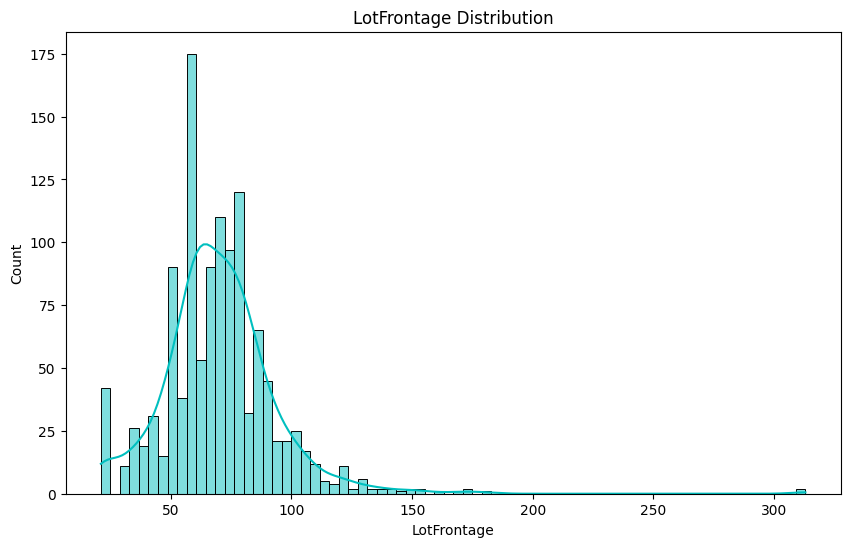

In [9]:
# LotFrontage Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(train_df['LotFrontage'], kde=True, color='c')
plt.title('LotFrontage Distribution')
plt.show()

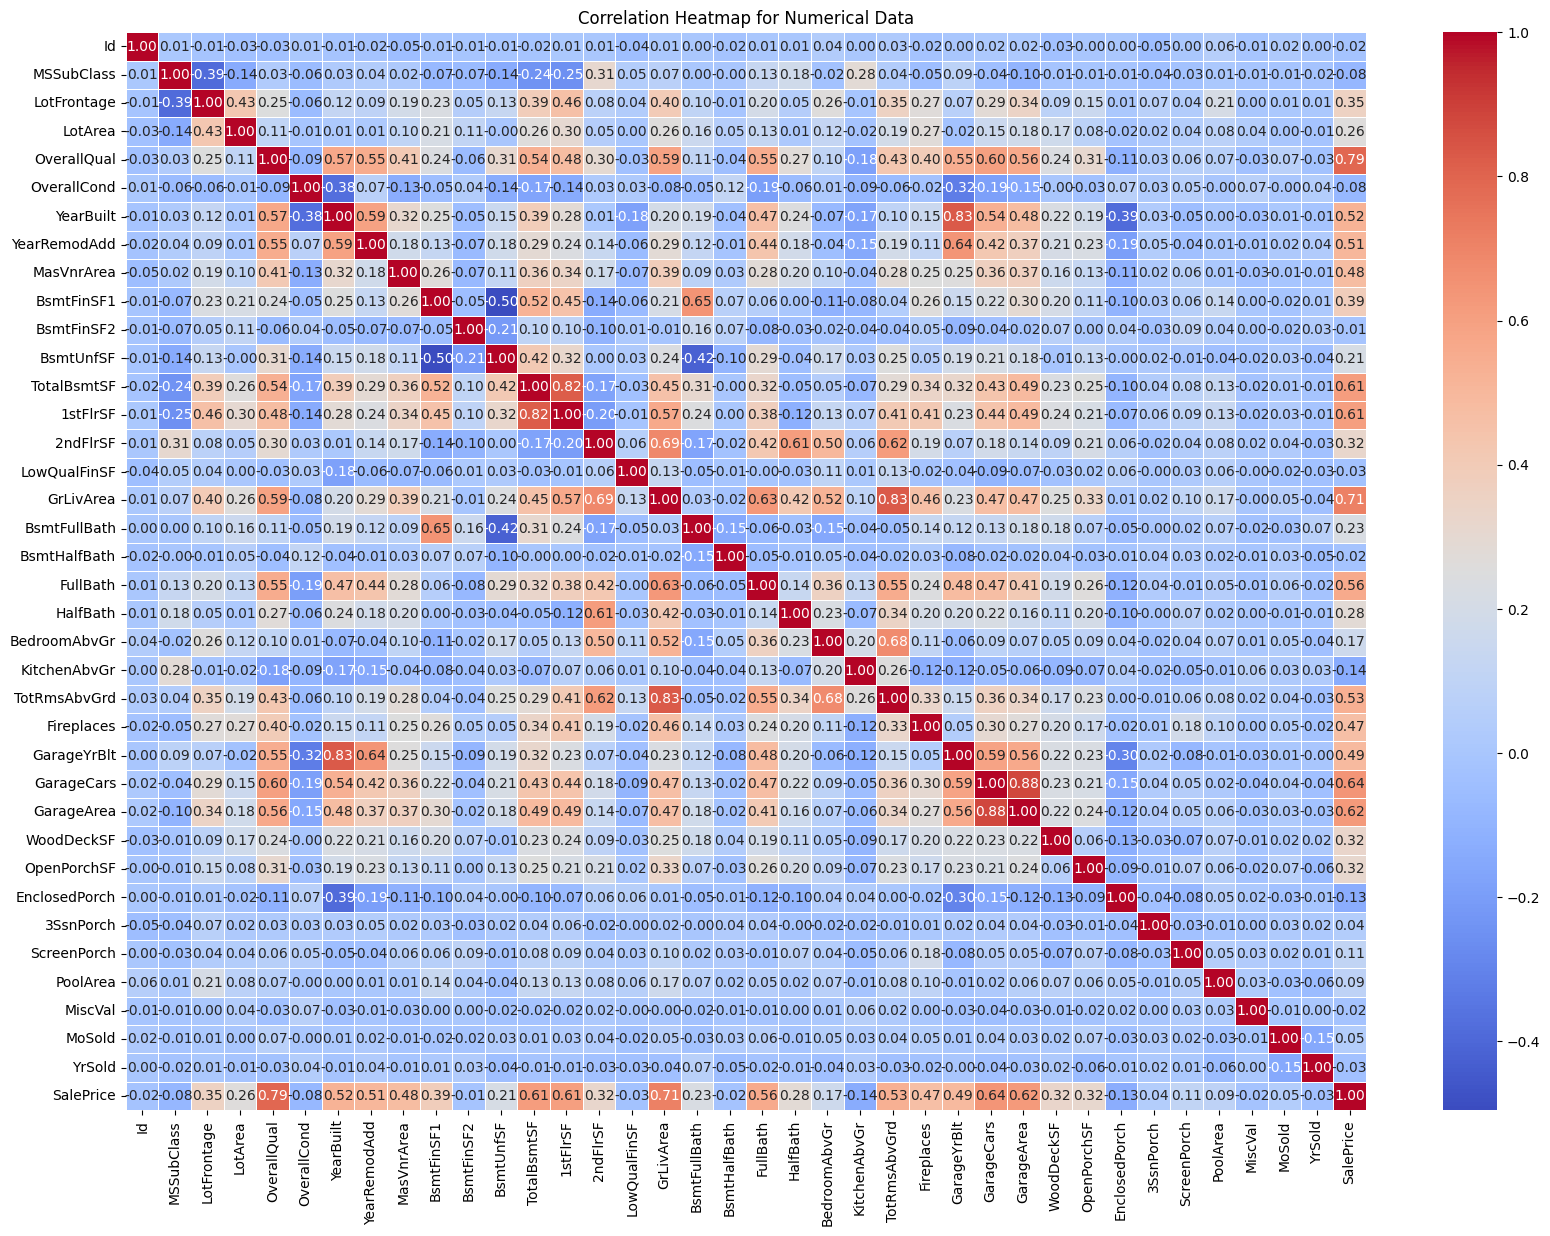

In [10]:
# Numerical columns -- Extraction
num_col = train_df.select_dtypes(include=['int64', 'float64']).columns
# Calculate the correlation matrix
correlation_matrix = train_df[num_col].corr()

plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Numerical Data')
plt.show()

In [11]:
# Fetching only those fields where the correlation greater than .6
# Compute the correlation matrix
numeric_df = train_df.select_dtypes(include='number').dropna()

correlation_matrix = numeric_df.corr()

# Get the correlation of each column with 'SalePrice'
saleprice_correlation = correlation_matrix['SalePrice']

# Filter columns with correlation greater than 0.6
selected_columns = saleprice_correlation[abs(saleprice_correlation) > 0.6].index.tolist()

# Fetch only the selected columns from the DataFrame
selected_df = numeric_df[selected_columns]

In [12]:
selected_df

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,175000
1456,6,1542,2073,2073,2,500,210000
1457,7,1152,1188,2340,1,252,266500
1458,5,1078,1078,1078,1,240,142125


In [13]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1121 non-null   int64
 1   TotalBsmtSF  1121 non-null   int64
 2   1stFlrSF     1121 non-null   int64
 3   GrLivArea    1121 non-null   int64
 4   GarageCars   1121 non-null   int64
 5   GarageArea   1121 non-null   int64
 6   SalePrice    1121 non-null   int64
dtypes: int64(7)
memory usage: 70.1 KB


In [15]:
# Correlation Matrix only for selected numeric cols
selected_corr_matrix = selected_df.corr()

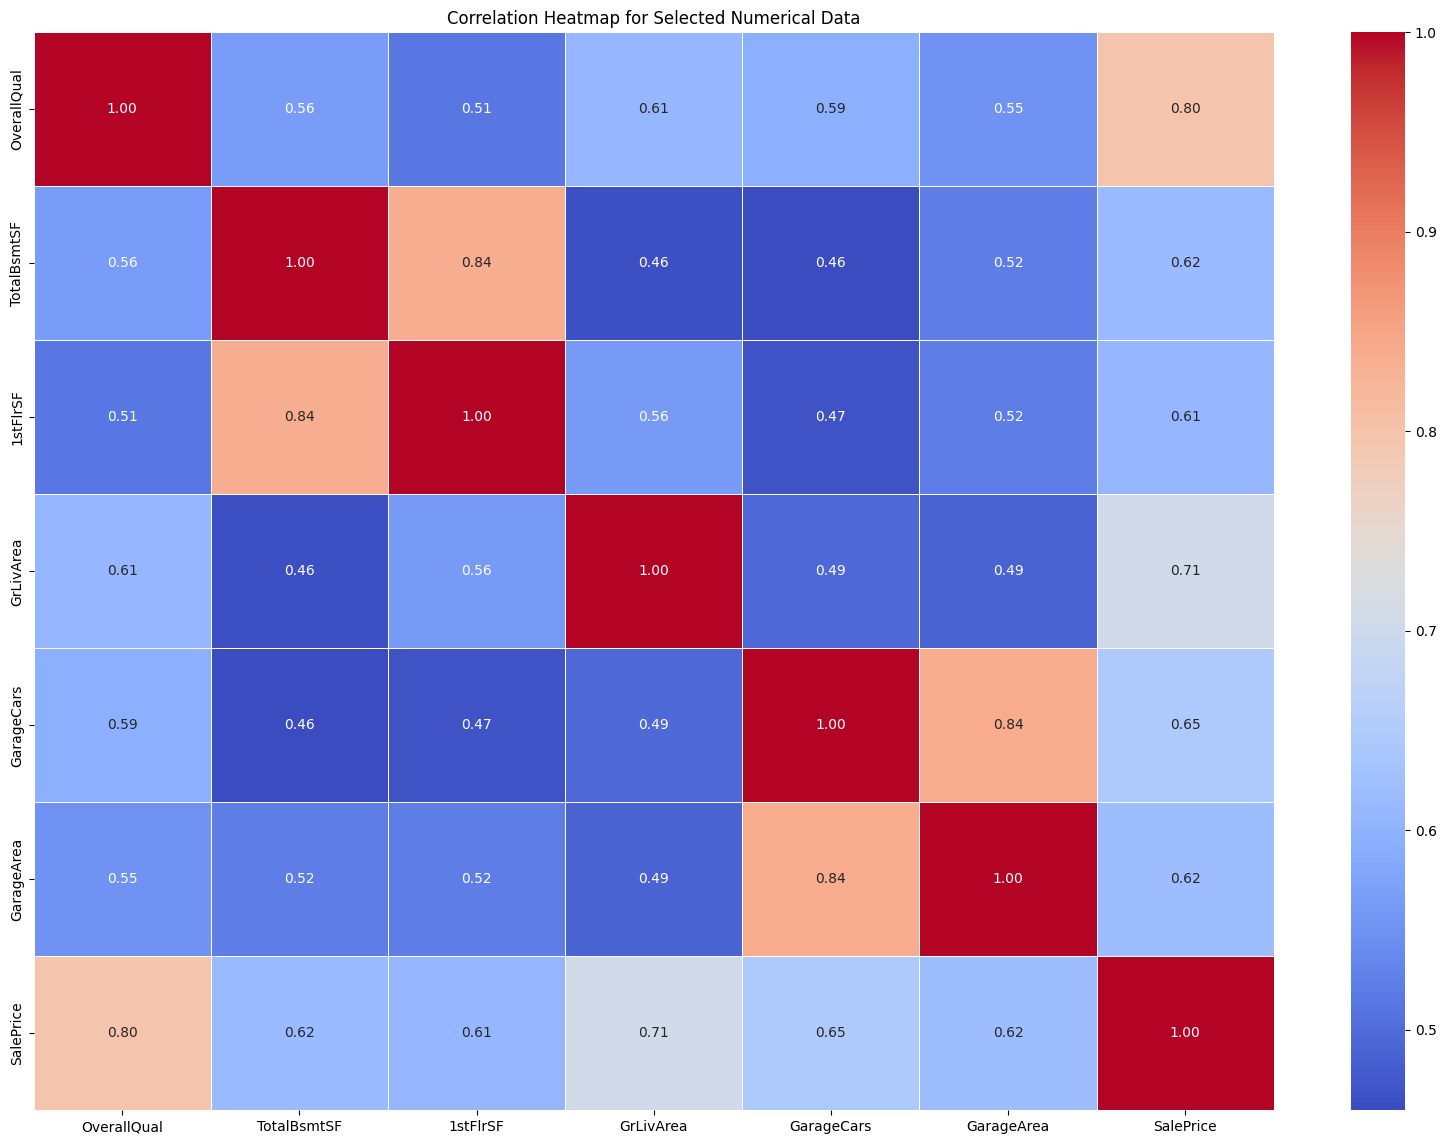

In [16]:
plt.figure(figsize=(20, 14))
sns.heatmap(selected_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Selected Numerical Data')
plt.show()

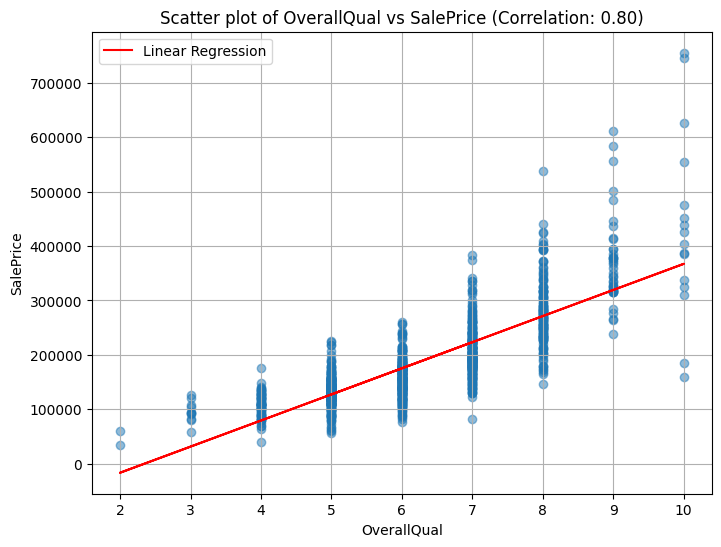

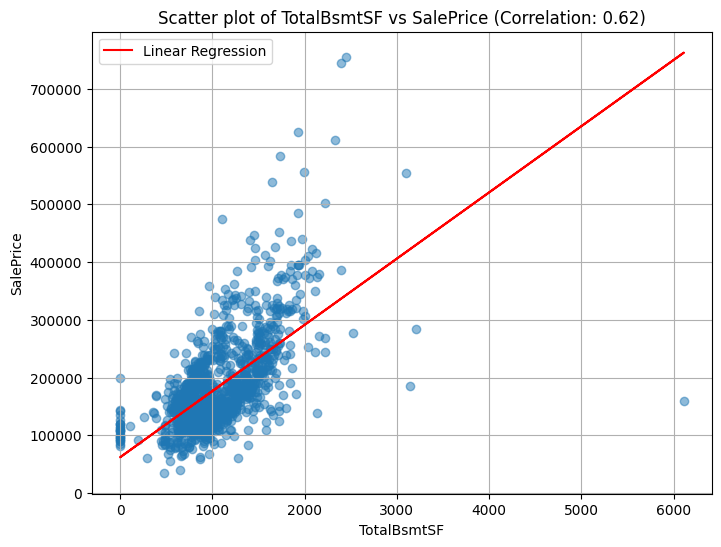

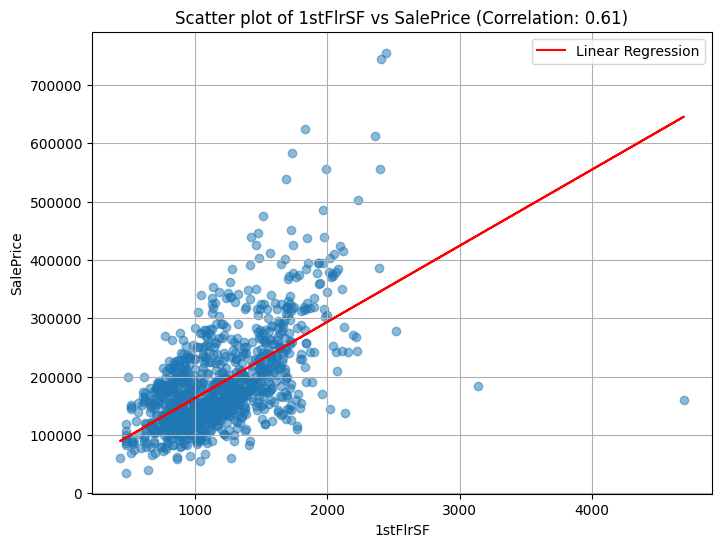

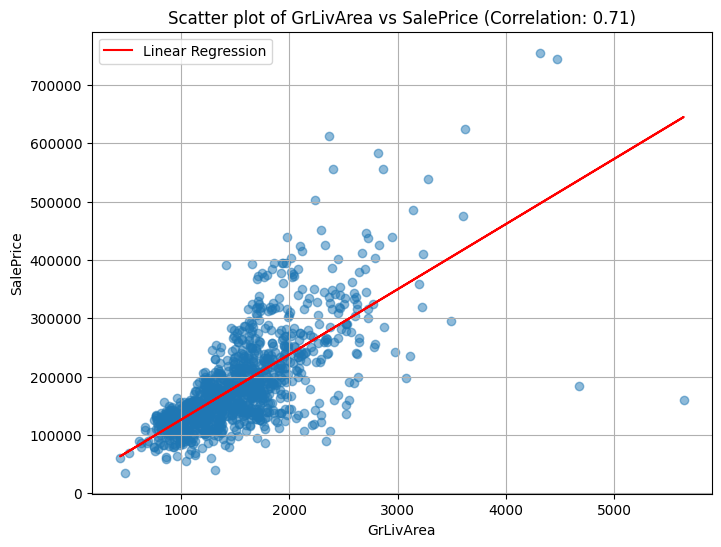

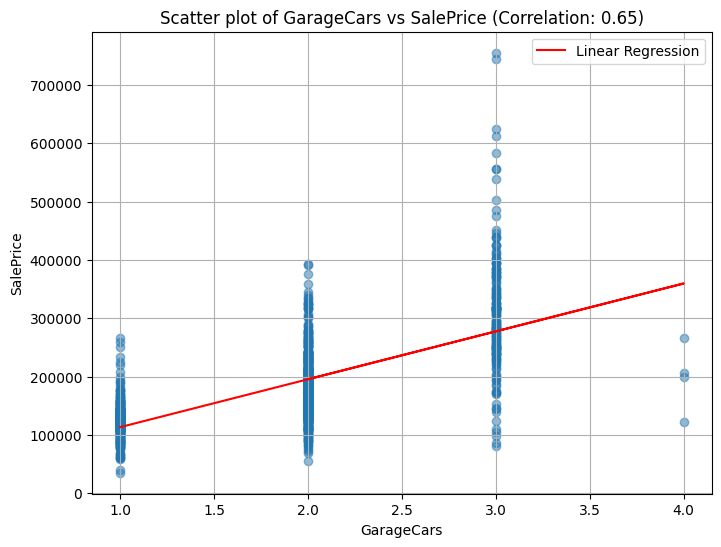

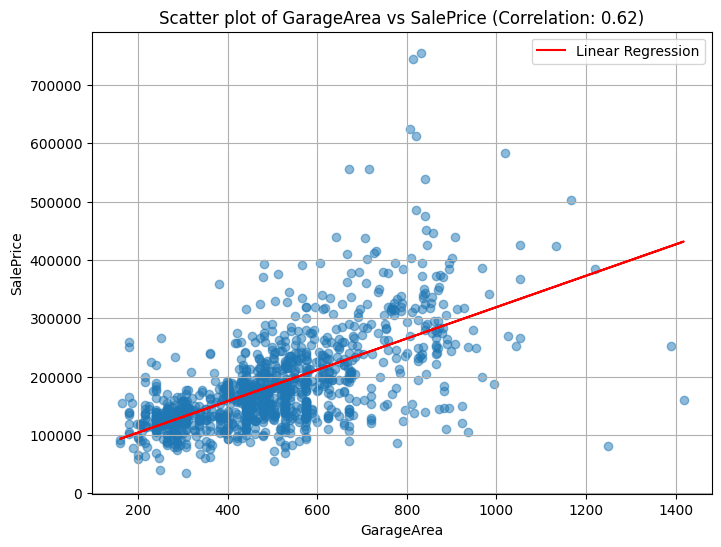

In [22]:
# Extracting target variable name
target_variable = 'SalePrice'

# Extracting features (all columns except the target variable)
features = [col for col in selected_df.columns if col != target_variable]

# Creating scatter plots for each feature against the target variable
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(selected_df[feature], selected_df[target_variable], alpha=0.5)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(selected_df[feature], selected_df[target_variable])
    
    # Plotting the linear regression line
    plt.plot(selected_df[feature], slope * selected_df[feature] + intercept, color='red', label='Linear Regression')
    
    # Calculating correlation coefficient
    correlation_coefficient = selected_df[feature].corr(selected_df[target_variable])
    
    plt.title(f'Scatter plot of {feature} vs {target_variable} (Correlation: {correlation_coefficient:.2f})')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(True)
    plt.show()